### Step 1: Read and Understand the Data
Let's start with the following steps:

Importing data using the pandas library
Understanding the structure of the data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import GridSearchCV
#from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
#from sklearn.pipeline import Pipeline
from sklearn import metrics

In [2]:
#To supress scientific notation of values
pd.options.display.float_format = '{:.2f}'.format

#To increase the maximum number of columns and rows displayed with pandas.
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

In [3]:
house = pd.read_csv('train.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.00,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1379.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,730.50,56.90,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,1978.51,1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.20
std,421.61,42.30,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.69,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.50
min,1.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,365.75,20.00,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,1129.50,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1961.00,1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.00
50%,730.50,50.00,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,477.50,991.50,1087.00,0.00,0.00,1464.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1980.00,2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,1095.25,70.00,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,808.00,1298.25,1391.25,728.00,0.00,1776.75,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
max,1460.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,2336.00,6110.00,4692.00,2065.00,572.00,5642.00,3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,2010.00,4.00,1418.00,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.00


## Step -2 Cleaning the Data 

In [6]:
#Calculating percentage of null values

na_percentage = round(100*(house.isnull().sum()/len(house.index)), 2)

#Filtering those rows that have more than 0% of null/na values
na_percentage[na_percentage > 0]

LotFrontage    17.74
Alley          93.77
MasVnrType      0.55
MasVnrArea      0.55
BsmtQual        2.53
BsmtCond        2.53
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtFinType2    2.60
Electrical      0.07
FireplaceQu    47.26
GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
PoolQC         99.52
Fence          80.75
MiscFeature    96.30
dtype: float64

In [7]:
#Since we have good number of columns with more than 30% of null values. Hence, we will now drop the columns

house.drop(na_percentage[na_percentage > 30].index, axis = 1, inplace = True)


In [8]:
#Now finding those columns who have singular values, therefore, will not contribute towards our goal.

house.nunique().sort_values()

Street              2
Utilities           2
CentralAir          2
PavedDrive          3
BsmtHalfBath        3
LandSlope           3
HalfBath            3
GarageFinish        3
Fireplaces          4
BsmtQual            4
ExterQual           4
BsmtFullBath        4
MasVnrType          4
FullBath            4
KitchenAbvGr        4
KitchenQual         4
BsmtExposure        4
BsmtCond            4
LandContour         4
LotShape            4
BldgType            5
YrSold              5
Electrical          5
GarageCars          5
LotConfig           5
GarageQual          5
GarageCond          5
ExterCond           5
MSZoning            5
HeatingQC           5
BsmtFinType1        6
BsmtFinType2        6
Heating             6
RoofStyle           6
SaleCondition       6
GarageType          6
Foundation          6
Functional          7
BedroomAbvGr        8
PoolArea            8
Condition2          8
RoofMatl            8
HouseStyle          8
Condition1          9
OverallCond         9
SaleType  

In [9]:
#Since there is no column with singular value, we can move ahead with these columns.

In [10]:
house.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [11]:
# We will impute the missing values with the median for continuous column and with mode for categorical columns

house['LotFrontage'] = house['LotFrontage'].fillna(house['LotFrontage'].median())

house['GarageYrBlt'] = house['GarageYrBlt'].fillna(house['GarageYrBlt'].median())

# for the "below categorical columns" we will impute the null values with 'mode'
for col in ('GarageCond', 'GarageType', 'GarageFinish','GarageQual',
            'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1','BsmtCond','BsmtQual',
           'MasVnrArea', 'MasVnrType', 'Electrical'):
    
    house[col] = house[col].fillna(house[col].mode()[0])
    


In [12]:
#Dropping outliers from the dataset, in case any.
def outlier_var(x):
    if ((x.dtype=='float') or (x.dtype=='int')):
        x= x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99))
    else:
        x
    return x

house = house.apply(outlier_var)

In [13]:
house.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [14]:
#Checking the skewness of the data

/Users/charu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

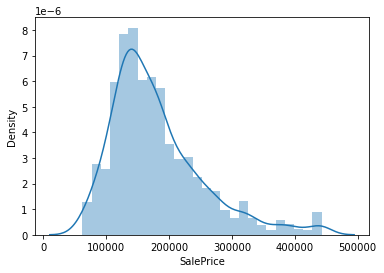

In [15]:
sns.distplot(house['SalePrice'])


/Users/charu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

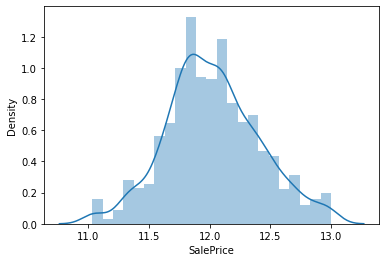

In [16]:
#Right sided skewness is oberserved, hence we will apply Log Transformation 

house['SalePrice']=np.log1p(house['SalePrice'])
sns.distplot(house['SalePrice'])

## Step - 3 Exploratory Data Analysis

### Identify Continuous and Categorical Features

Making a correlation matrix of all the numeric variables, to visualise correlation between variables.

#### numeric variables =
(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice])


In [17]:
# Dropping ID Column
house = house.drop(['Id'], axis=1)


In [18]:
house['PoolArea'].value_counts()

0.00    1460
Name: PoolArea, dtype: int64

In [19]:
#Since there is not much diversity in the Pool area, hence we will drop the column

house = house.drop(['PoolArea'],axis = 1)

In [20]:
# correlation matrix
house_corr = house.corr()
house_corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.00,-0.39,-0.29,0.03,-0.06,0.03,0.04,0.02,-0.07,-0.07,-0.14,-0.25,-0.26,0.31,0.05,0.08,0.00,-0.01,0.14,0.17,-0.04,0.29,0.04,-0.05,0.08,-0.04,-0.10,-0.02,-0.00,-0.01,-0.03,-0.03,-0.03,-0.01,-0.02,-0.08
LotFrontage,-0.39,1.00,0.47,0.24,-0.06,0.13,0.08,0.19,0.14,0.05,0.15,0.33,0.39,0.06,0.03,0.33,0.07,-0.00,0.19,0.05,0.26,-0.00,0.32,0.23,0.07,0.30,0.33,0.09,0.14,-0.01,0.06,0.05,0.01,0.01,0.01,0.36
LotArea,-0.29,0.47,1.00,0.18,-0.02,0.04,0.04,0.16,0.23,0.10,0.04,0.33,0.42,0.10,0.01,0.39,0.16,0.05,0.20,0.08,0.24,-0.01,0.33,0.34,-0.01,0.27,0.30,0.22,0.16,-0.02,0.05,0.10,0.06,-0.01,-0.04,0.38
OverallQual,0.03,0.24,0.18,1.00,-0.11,0.58,0.55,0.42,0.22,-0.07,0.30,0.54,0.47,0.29,-0.03,0.59,0.11,-0.04,0.56,0.29,0.11,-0.19,0.43,0.40,0.52,0.61,0.57,0.24,0.32,-0.13,0.03,0.06,-0.08,0.07,-0.03,0.82
OverallCond,-0.06,-0.06,-0.02,-0.11,1.00,-0.39,0.07,-0.13,-0.05,0.04,-0.14,-0.18,-0.15,0.02,0.03,-0.09,-0.05,0.13,-0.21,-0.06,0.01,-0.09,-0.06,-0.03,-0.31,-0.19,-0.16,-0.00,-0.05,0.08,0.04,0.05,0.09,-0.00,0.05,-0.05
YearBuilt,0.03,0.13,0.04,0.58,-0.39,1.00,0.60,0.33,0.25,-0.06,0.15,0.41,0.29,0.02,-0.18,0.21,0.19,-0.05,0.48,0.26,-0.06,-0.17,0.11,0.15,0.78,0.55,0.49,0.23,0.22,-0.39,0.03,-0.05,-0.08,0.01,-0.01,0.60
YearRemodAdd,0.04,0.08,0.04,0.55,0.07,0.60,1.00,0.18,0.12,-0.08,0.18,0.30,0.24,0.14,-0.06,0.29,0.12,-0.01,0.45,0.20,-0.04,-0.16,0.19,0.11,0.62,0.43,0.38,0.22,0.25,-0.20,0.05,-0.04,-0.07,0.02,0.04,0.57
MasVnrArea,0.02,0.19,0.16,0.42,-0.13,0.33,0.18,1.00,0.25,-0.08,0.11,0.36,0.34,0.16,-0.07,0.38,0.09,0.03,0.28,0.20,0.11,-0.03,0.29,0.25,0.25,0.38,0.38,0.17,0.15,-0.11,0.03,0.06,-0.04,-0.00,-0.00,0.43
BsmtFinSF1,-0.07,0.14,0.23,0.22,-0.05,0.25,0.12,0.25,1.00,-0.05,-0.53,0.46,0.39,-0.17,-0.07,0.14,0.66,0.08,0.06,-0.01,-0.11,-0.08,0.01,0.24,0.15,0.23,0.28,0.21,0.09,-0.11,0.04,0.07,0.00,-0.00,0.01,0.38
BsmtFinSF2,-0.07,0.05,0.10,-0.07,0.04,-0.06,-0.08,-0.08,-0.05,1.00,-0.21,0.10,0.10,-0.11,0.02,-0.02,0.16,0.09,-0.09,-0.04,-0.01,-0.04,-0.04,0.04,-0.10,-0.04,-0.02,0.07,-0.01,0.04,-0.03,0.09,-0.01,-0.01,0.03,-0.01


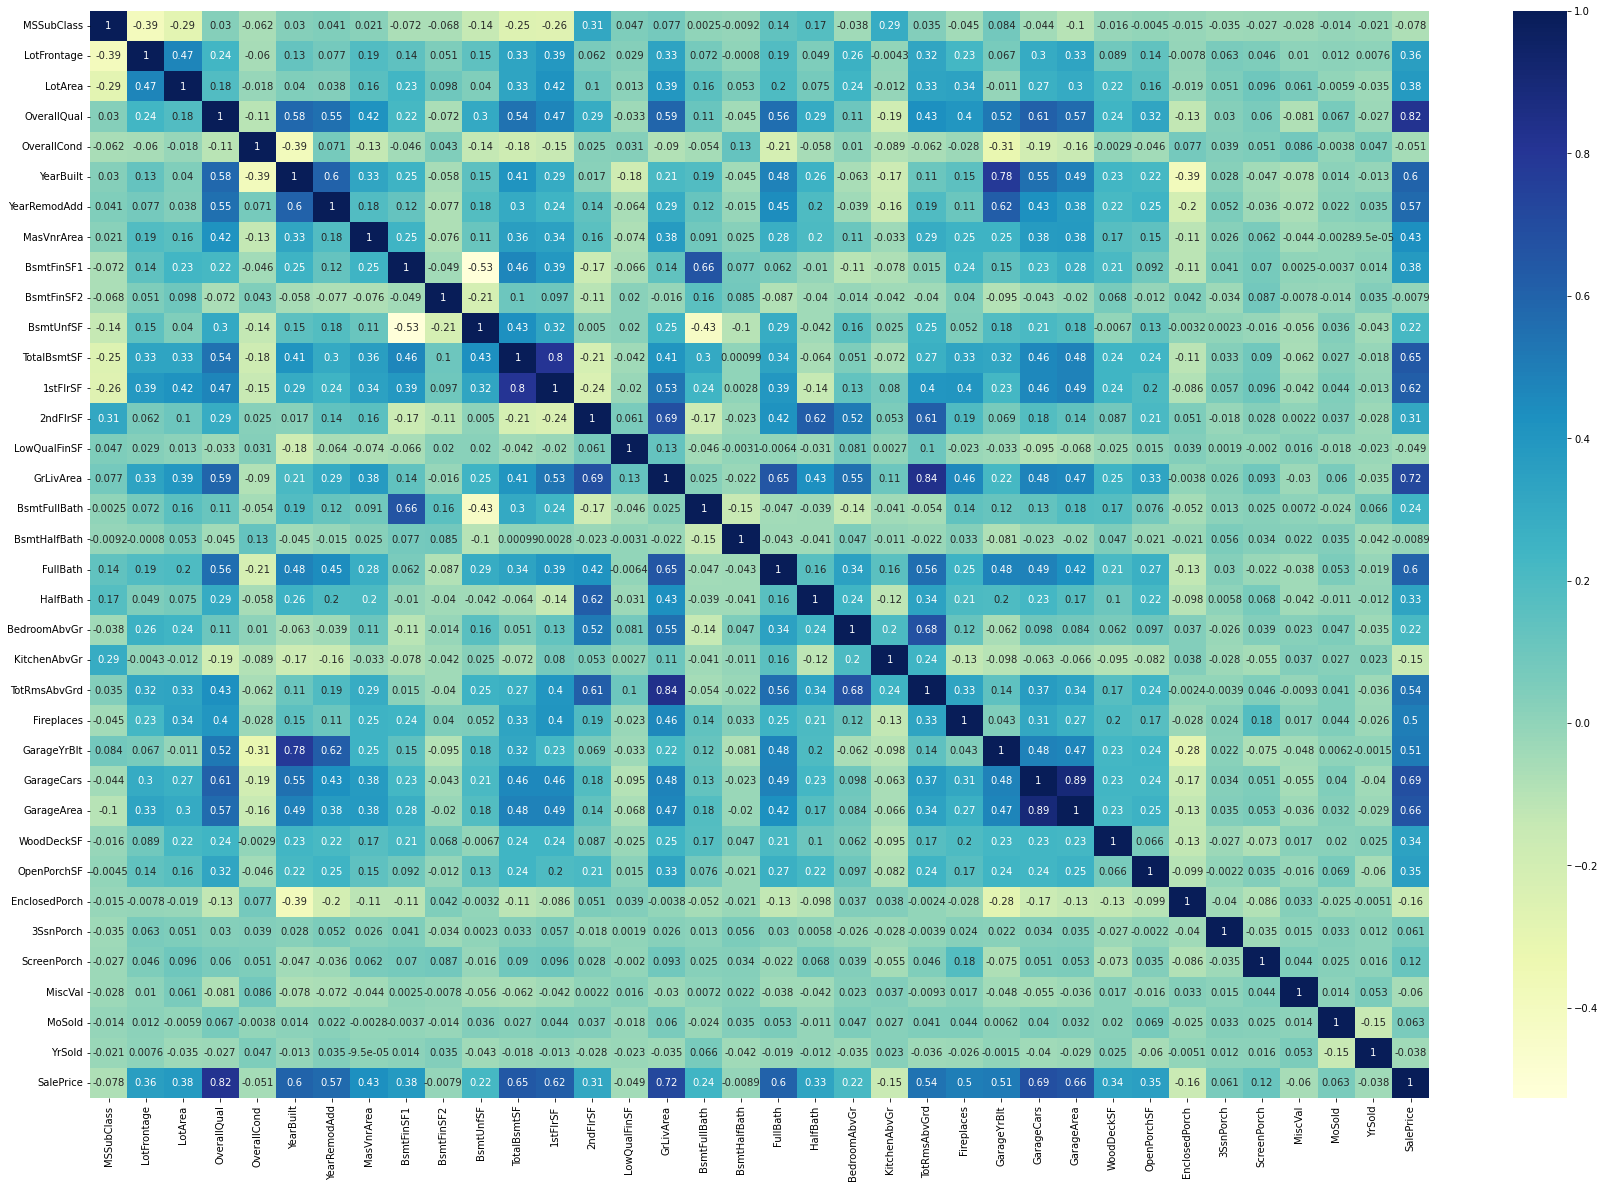

In [21]:
# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(house_corr, cmap="YlGnBu", annot=True)
plt.show()

In [22]:
corr_saleprice = house.corr()['SalePrice']
corr_saleprice

MSSubClass      -0.08
LotFrontage      0.36
LotArea          0.38
OverallQual      0.82
OverallCond     -0.05
YearBuilt        0.60
YearRemodAdd     0.57
MasVnrArea       0.43
BsmtFinSF1       0.38
BsmtFinSF2      -0.01
BsmtUnfSF        0.22
TotalBsmtSF      0.65
1stFlrSF         0.62
2ndFlrSF         0.31
LowQualFinSF    -0.05
GrLivArea        0.72
BsmtFullBath     0.24
BsmtHalfBath    -0.01
FullBath         0.60
HalfBath         0.33
BedroomAbvGr     0.22
KitchenAbvGr    -0.15
TotRmsAbvGrd     0.54
Fireplaces       0.50
GarageYrBlt      0.51
GarageCars       0.69
GarageArea       0.66
WoodDeckSF       0.34
OpenPorchSF      0.35
EnclosedPorch   -0.16
3SsnPorch        0.06
ScreenPorch      0.12
MiscVal         -0.06
MoSold           0.06
YrSold          -0.04
SalePrice        1.00
Name: SalePrice, dtype: float64

/Users/charu/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


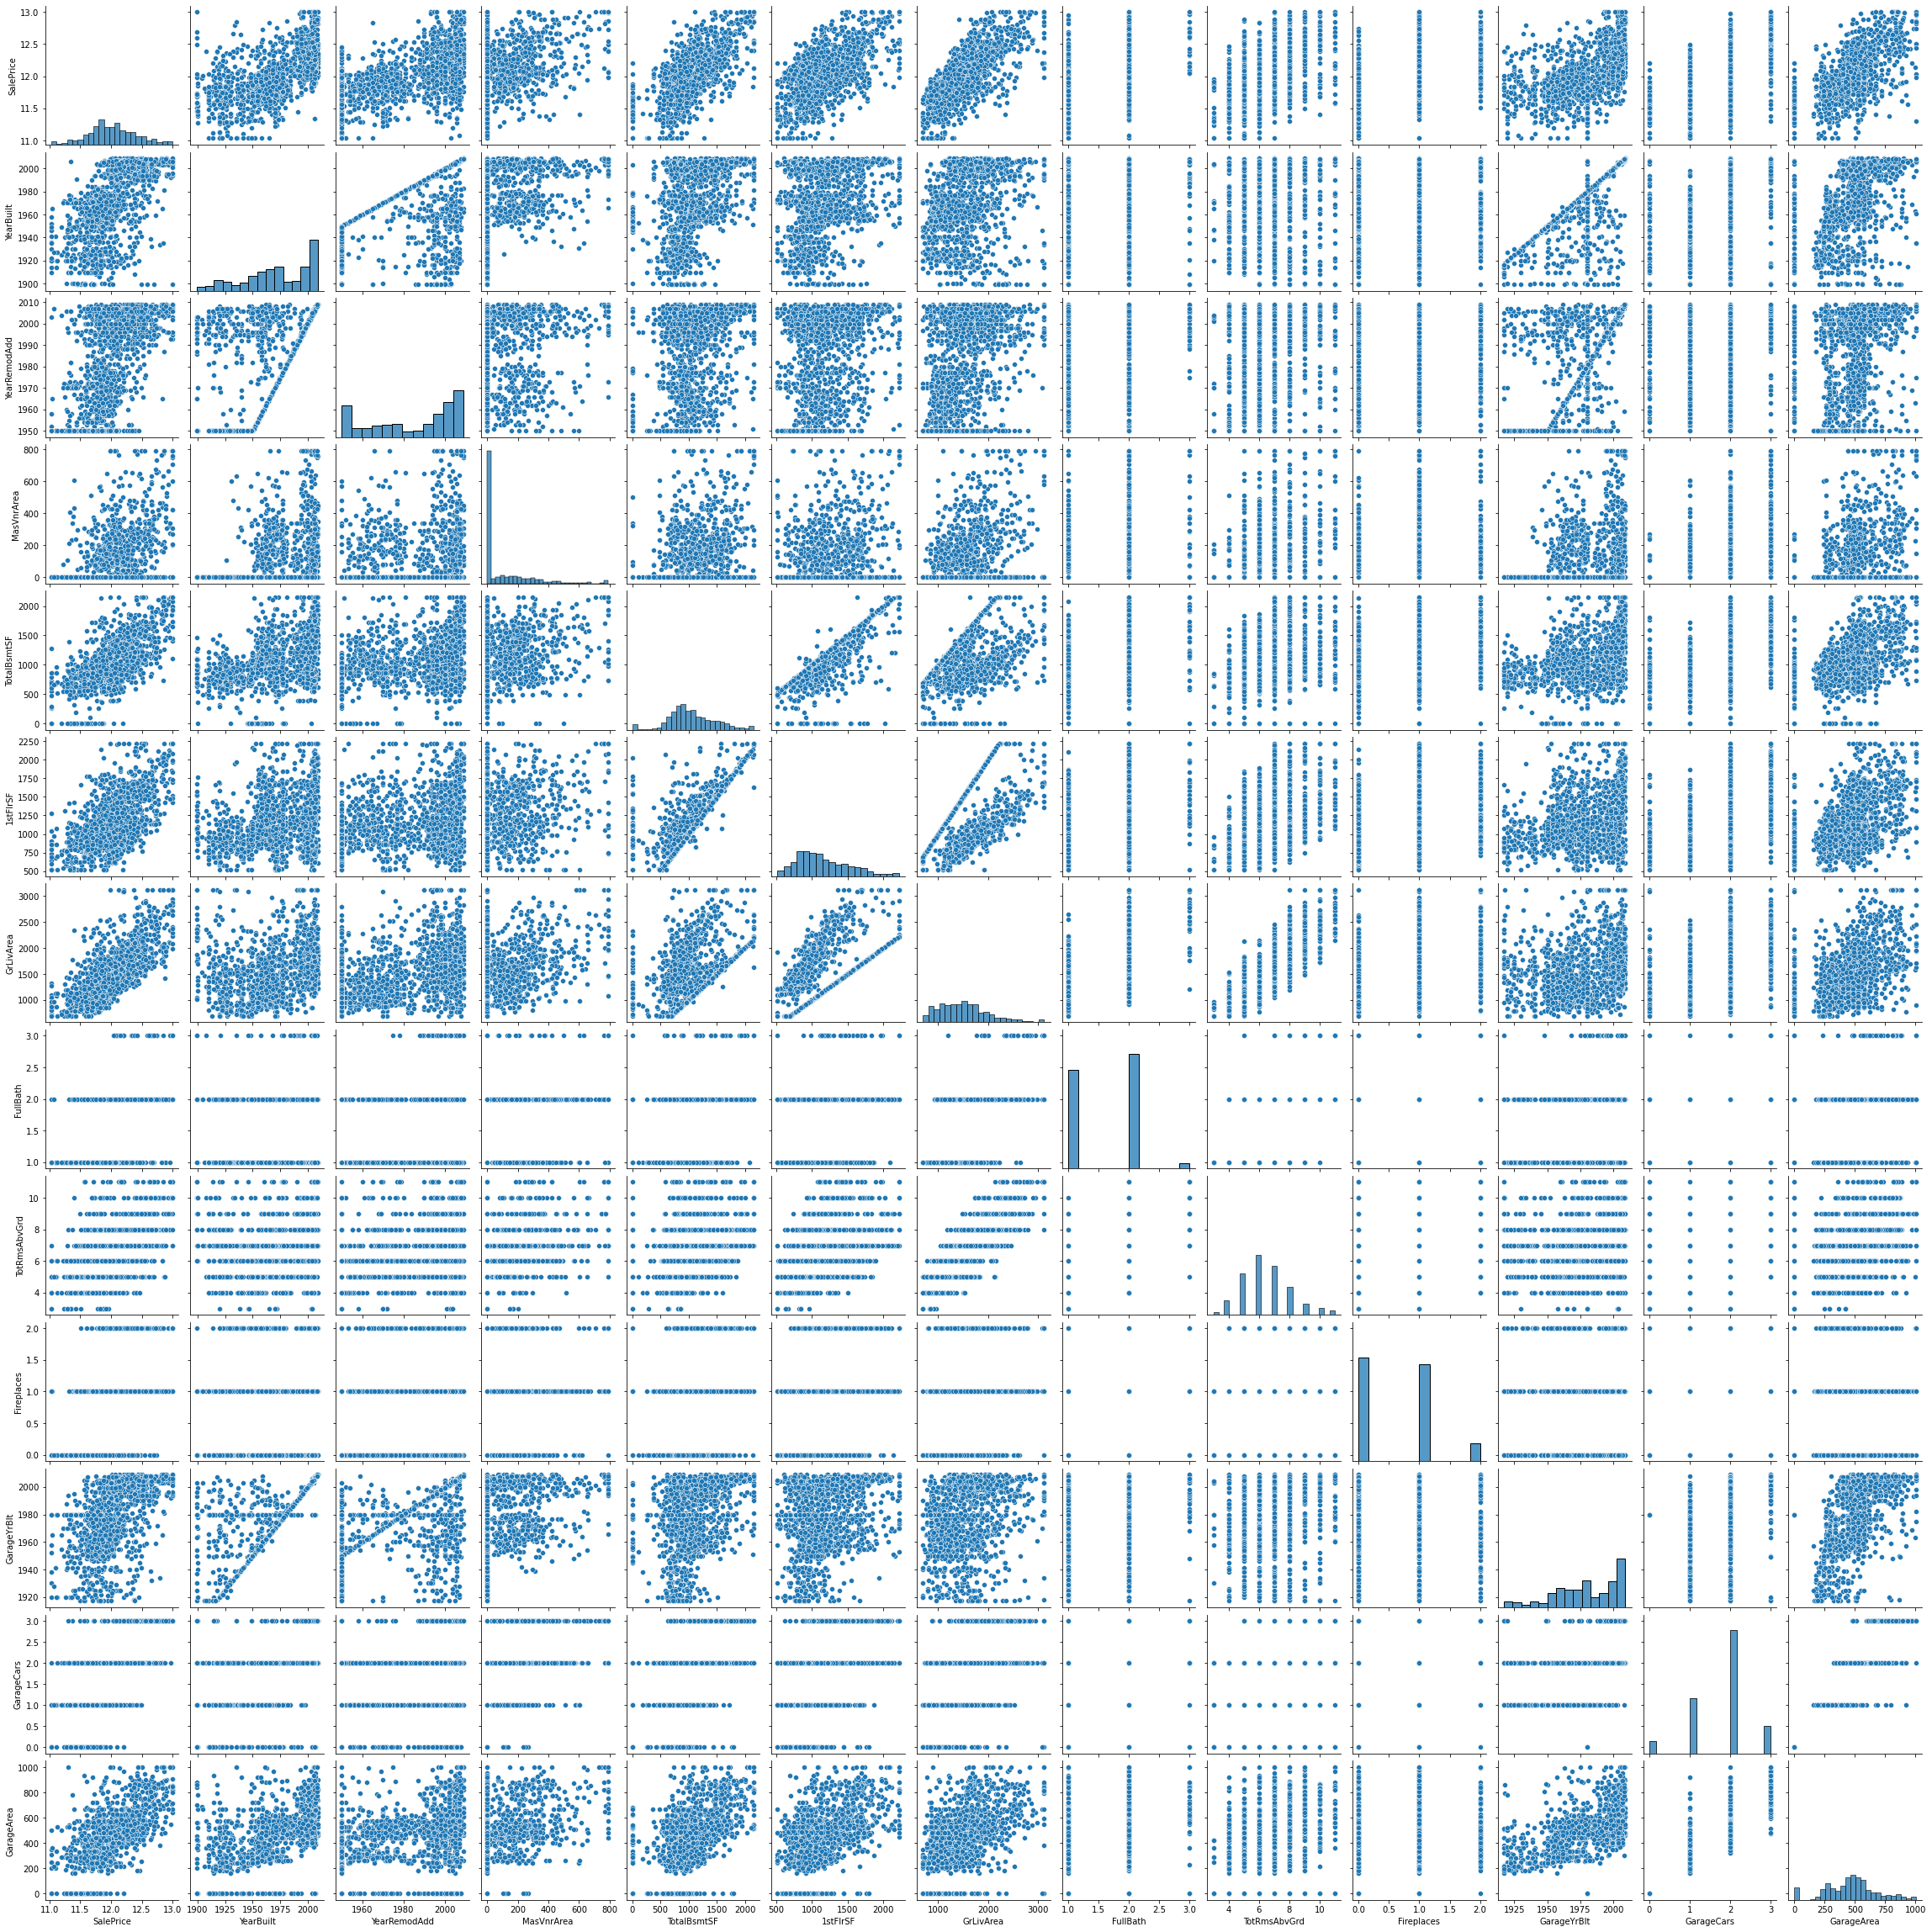

In [23]:
#cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']

cols = ['SalePrice','YearBuilt','YearRemodAdd','MasVnrArea','TotalBsmtSF','1stFlrSF',
        'GrLivArea','FullBath','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea']


sns.pairplot(house[cols], size = 2.5)
plt.show()

In [24]:
#Based on the pairplot, we can say the following columns are not well correlated, hence we will drop them

house = house.drop(['FullBath','TotRmsAbvGrd','GarageCars','Fireplaces'], axis = 1)


In [25]:
cat_cols = house.select_dtypes(include=['object'])
cat_cols.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

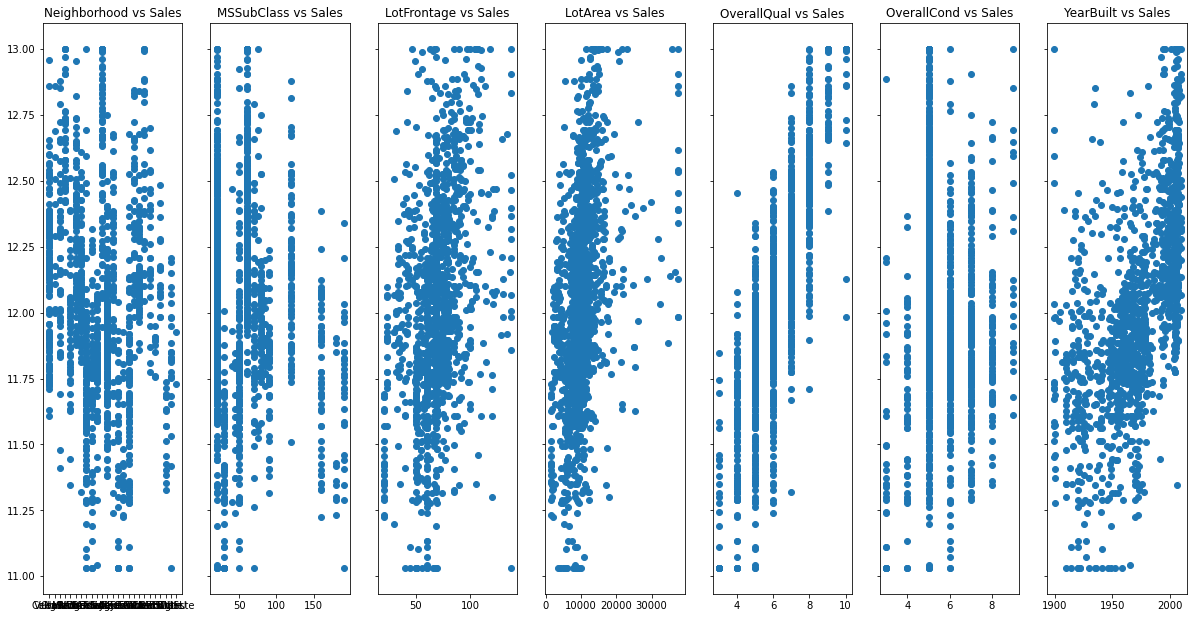

In [26]:
fig, ax = plt.subplots(ncols=7, sharey=True)

Neighborhood = ax[0].scatter(house['Neighborhood'], house['SalePrice'])
Neighborhood.set_label("Neighborhood")
ax[0].set_title('Neighborhood vs Sales')

MSSubClass = ax[1].scatter(house['MSSubClass'], house['SalePrice'])
MSSubClass.set_label("MSSubClass")
ax[1].set_title('MSSubClass vs Sales')

LotFrontage= ax[2].scatter(house['LotFrontage'], house['SalePrice'])
LotFrontage.set_label("LotFrontage")
ax[2].set_title('LotFrontage vs Sales')

LotArea = ax[3].scatter(house['LotArea'], house['SalePrice'])
LotArea.set_label("LotArea")
ax[3].set_title('LotArea vs Sales')

OverallQual = ax[4].scatter(house['OverallQual'], house['SalePrice'])
OverallQual.set_label("LotArea")
ax[4].set_title('OverallQual vs Sales')

OverallCond = ax[5].scatter(house['OverallCond'], house['SalePrice'])
OverallCond.set_label("OverallCond")
ax[5].set_title('OverallCond vs Sales')

YearBuilt = ax[6].scatter(house['YearBuilt'], house['SalePrice'])
YearBuilt.set_label("YearBuilt")
ax[6].set_title('YearBuilt vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

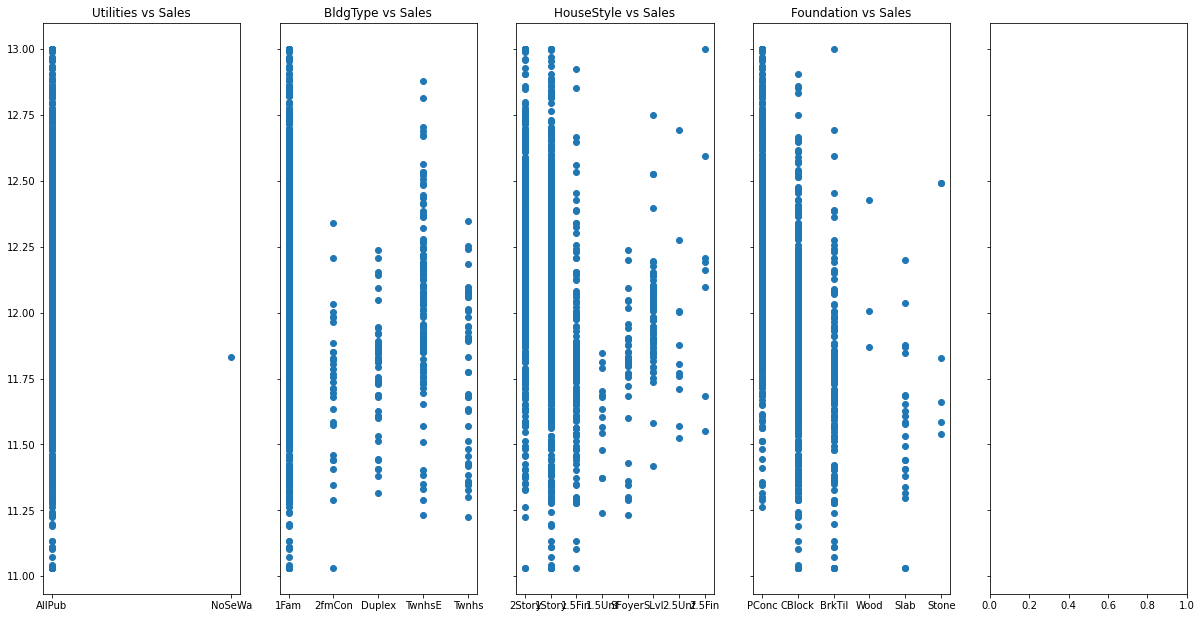

In [27]:
fig, ax = plt.subplots(ncols=5, sharey=True)

MSSubClass = ax[0].scatter(house['Utilities'], house['SalePrice'])
MSSubClass.set_label("Utilities")
ax[0].set_title('Utilities vs Sales')

LotFrontage= ax[1].scatter(house['BldgType'], house['SalePrice'])
LotFrontage.set_label("BldgType")
ax[1].set_title('BldgType vs Sales')

LotArea = ax[2].scatter(house['HouseStyle'], house['SalePrice'])
LotArea.set_label("HouseStyle")
ax[2].set_title('HouseStyle vs Sales')

OverallQual = ax[3].scatter(house['Foundation'], house['SalePrice'])
OverallQual.set_label("Foundation")
ax[3].set_title('Foundation vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

In [28]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   float64
 16  OverallCond    1460 non-null   float64
 17  YearBuilt      1460 non-null   float64
 18  YearRemo

In [29]:
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.00,8450.00,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.00,5.00,2003.00,2003.00,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706.00,Unf,0.00,150.00,856.00,GasA,Ex,Y,SBrkr,856.00,854.00,0.00,1710.00,1.00,0.00,1.00,3.00,1.00,Gd,Typ,Attchd,2003.00,RFn,548.00,TA,TA,Y,0.00,61.00,0.00,0.00,0.00,0.00,2,2008,WD,Normal,12.25
1,20,RL,80.00,9600.00,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.00,8.00,1976.00,1976.00,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.00,Unf,0.00,284.00,1262.00,GasA,Ex,Y,SBrkr,1262.00,0.00,0.00,1262.00,0.00,1.00,0.00,3.00,1.00,TA,Typ,Attchd,1976.00,RFn,460.00,TA,TA,Y,298.00,0.00,0.00,0.00,0.00,0.00,5,2007,WD,Normal,12.11
2,60,RL,68.00,11250.00,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.00,5.00,2001.00,2002.00,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.00,Unf,0.00,434.00,920.00,GasA,Ex,Y,SBrkr,920.00,866.00,0.00,1786.00,1.00,0.00,1.00,3.00,1.00,Gd,Typ,Attchd,2001.00,RFn,608.00,TA,TA,Y,0.00,42.00,0.00,0.00,0.00,0.00,9,2008,WD,Normal,12.32
3,70,RL,60.00,9550.00,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.00,5.00,1915.00,1970.00,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216.00,Unf,0.00,540.00,756.00,GasA,Gd,Y,SBrkr,961.00,756.00,0.00,1717.00,1.00,0.00,0.00,3.00,1.00,Gd,Typ,Detchd,1998.00,Unf,642.00,TA,TA,Y,0.00,35.00,261.05,0.00,0.00,0.00,2,2006,WD,Abnorml,11.85
4,60,RL,84.00,14260.00,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.00,5.00,2000.00,2000.00,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655.00,Unf,0.00,490.00,1145.00,GasA,Ex,Y,SBrkr,1145.00,1053.00,0.00,2198.00,1.00,0.00,1.00,4.00,1.00,Gd,Typ,Attchd,2000.00,RFn,836.00,TA,TA,Y,192.00,84.00,0.00,0.00,0.00,0.00,12,2008,WD,Normal,12.43


### Creating Dummy variables 

In [30]:
# Convert categorical value into Dummy variable

house = pd.get_dummies(house,drop_first=True)
house.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,HalfBath,BedroomAbvGr,KitchenAbvGr,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,...,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.00,8450.00,7.00,5.00,2003.00,2003.00,196.00,706.00,0.00,150.00,856.00,856.00,854.00,0.00,1710.00,1.00,0.00,1.00,3.00,1.00,2003.00,548.00,0.00,61.00,0.00,0.00,0.00,0.00,2,2008,12.25,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.00,9600.00,6.00,8.00,1976.00,1976.00,0.00,978.00,0.00,284.00,1262.00,1262.00,0.00,0.00,1262.00,0.00,1.00,0.00,3.00,1.00,1976.00,460.00,298.00,0.00,0.00,0.00,0.00,0.00,5,2007,12.11,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.00,11250.00,7.00,5.00,2001.00,2002.00,162.00,486.00,0.00,434.00,920.00,920.00,866.00,0.00,1786.00,1.00,0.00,1.00,3.00,1.00,2001.00,608.00,0.00,42.00,0.00,0.00,0.00,0.00,9,2008,12.32,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.00,9550.00,7.00,5.00,1915.00,1970.00,0.00,216.00,0.00,540.00,756.00,961.00,756.00,0.00,1717.00,1.00,0.00,0.00,3.00,1.00,1998.00,642.00,0.00,35.00,261.05,0.00,0.00,0.00,2,2006,11.85,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0

In [31]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 228 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(29), int64(3), uint8(196)
memory usage: 644.6 KB


## Step 4 - Splitting the data into train and test sets 

In [32]:
X = house.drop(['SalePrice'], axis=1)

X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,HalfBath,BedroomAbvGr,KitchenAbvGr,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,...,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.00,8450.00,7.00,5.00,2003.00,2003.00,196.00,706.00,0.00,150.00,856.00,856.00,854.00,0.00,1710.00,1.00,0.00,1.00,3.00,1.00,2003.00,548.00,0.00,61.00,0.00,0.00,0.00,0.00,2,2008,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.00,9600.00,6.00,8.00,1976.00,1976.00,0.00,978.00,0.00,284.00,1262.00,1262.00,0.00,0.00,1262.00,0.00,1.00,0.00,3.00,1.00,1976.00,460.00,298.00,0.00,0.00,0.00,0.00,0.00,5,2007,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.00,11250.00,7.00,5.00,2001.00,2002.00,162.00,486.00,0.00,434.00,920.00,920.00,866.00,0.00,1786.00,1.00,0.00,1.00,3.00,1.00,2001.00,608.00,0.00,42.00,0.00,0.00,0.00,0.00,9,2008,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.00,9550.00,7.00,5.00,1915.00,1970.00,0.00,216.00,0.00,540.00,756.00,961.00,756.00,0.00,1717.00,1.00,0.00,0.00,3.00,1.00,1998.00,642.00,0.00,35.00,261.05,0.00,0.00,0.00,2,2006,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.00,14260.00

In [33]:
# Assign response variable to y
y = house['SalePrice']

y.head()

0   12.25
1   12.11
2   12.32
3   11.85
4   12.43
Name: SalePrice, dtype: float64

In [34]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

### Rescaling the Features
Re-scaling all the variables so that they are on the same scale for the model to be easily interpretable. We can use standardization(Standard scaler) or normalization(MinMax scaler).

In [35]:
#Using Standard Scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [36]:
X_train[['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']])


In [37]:
X_test[['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']])


In [38]:
num_vars= ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
           'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
           '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath',
           'BedroomAbvGr', 'KitchenAbvGr', 'GarageYrBlt', 'GarageArea',
           'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold']

In [39]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

### Model Building and Evaluation

#### Ridge and Lasso Regression

In [40]:
# Import required libaries for Ridge, Lasso and GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [41]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Applying lasso regression with 5 fold cross validation

lasso = Lasso()
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


/Users/charu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.663e-02, tolerance: 1.145e-02
  model = cd_fast.enet_coordinate_descent(
/Users/charu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.871e-02, tolerance: 1.228e-02
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [42]:
print(model_cv.best_params_)
print(model_cv.best_score_)


{'alpha': 0.001}
-0.08068748483330064


In [43]:
# cv_results
model_cv.cv_results_

{'mean_fit_time': array([0.13096409, 0.0276886 , 0.01166773, 0.01184959, 0.01040363,
        0.00987086, 0.00867982, 0.01059265, 0.01002512, 0.0083261 ,
        0.00762801, 0.00889921, 0.00780149, 0.00916848, 0.00934505,
        0.01135454, 0.01595616, 0.00890403, 0.00782938, 0.00825253,
        0.00879745, 0.00833635, 0.00794697, 0.01385732, 0.00945988,
        0.00864334, 0.00870142, 0.00790873]),
 'std_fit_time': array([0.04539089, 0.00288914, 0.00196158, 0.00435146, 0.00427926,
        0.00249519, 0.00165796, 0.00429305, 0.00224452, 0.00138883,
        0.00043176, 0.00245464, 0.0008608 , 0.00081506, 0.00211914,
        0.0062187 , 0.01616818, 0.00283025, 0.00117389, 0.00110871,
        0.00247245, 0.00176612, 0.00105451, 0.00993497, 0.00367257,
        0.00239653, 0.00087608, 0.00115545]),
 'mean_score_time': array([0.00548115, 0.00451961, 0.00469561, 0.00468693, 0.00509648,
        0.00527263, 0.00501523, 0.0044117 , 0.00853934, 0.00370531,
        0.00544543, 0.00390267, 0.004715

In [44]:
# At alpha = 0.001

alpha=0.001

lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [45]:
lasso.coef_

array([-5.45852228e-03,  5.99936258e-03,  0.00000000e+00,  1.90951363e-02,
        8.10459086e-02,  6.24375526e-02,  2.25117107e-02,  5.28076698e-02,
       -2.73499164e-04,  2.82677864e-02, -0.00000000e+00,  1.56214357e-03,
        3.14619870e-02,  9.63937623e-03,  0.00000000e+00, -8.18102547e-03,
        1.34288275e-01,  1.27578384e-02,  6.04476060e-03,  1.72759817e-03,
       -1.15374403e-02, -1.58819527e-03,  3.43066399e-02,  9.78404913e-03,
        3.04239963e-03,  2.07097215e-03,  1.48881487e-03,  1.07907061e-02,
       -4.66375108e-05,  3.01700658e-03, -5.03333538e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -6.06303103e-02,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.42682317e-03, -0.00000000e+00,  2.16393381e-02,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  3.78668206e-02,
        0.00000000e+00, -

In [46]:
# predict

y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))


0.9225515238069614
0.8994742031403766


In [47]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


RMSE : 0.12370352786980542


## Ridge Regression 

In [48]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation

ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridgeCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [49]:
print(ridgeCV.best_params_)
print(ridgeCV.best_score_)

{'alpha': 10.0}
-0.0801455284741873


In [50]:
ridgeCV.cv_results_

{'mean_fit_time': array([0.07499404, 0.05488205, 0.03148966, 0.02709584, 0.02933202,
        0.02199345, 0.02098441, 0.01828117, 0.01862535, 0.01846709,
        0.021877  , 0.01792483, 0.01993265, 0.01766624, 0.0250782 ,
        0.02509241, 0.0238934 , 0.01829147, 0.01739564, 0.01914601,
        0.01913209, 0.01909723, 0.0191494 , 0.01825304, 0.01883163,
        0.01953349, 0.02072234, 0.01898961]),
 'std_fit_time': array([0.02177256, 0.0224253 , 0.00761578, 0.00602973, 0.00510566,
        0.00129841, 0.00179769, 0.00061371, 0.00041247, 0.00075212,
        0.00371576, 0.00080765, 0.00113947, 0.00172826, 0.00496991,
        0.00591128, 0.00564816, 0.00116594, 0.00089414, 0.00226409,
        0.00138051, 0.00157949, 0.00177785, 0.00168399, 0.00118744,
        0.00370553, 0.00426623, 0.0025928 ]),
 'mean_score_time': array([0.01374059, 0.0208005 , 0.0119472 , 0.01128659, 0.01068864,
        0.00923758, 0.00912542, 0.00937872, 0.00957956, 0.00887971,
        0.00833478, 0.00813317, 0.007680

In [51]:
# ridge regression
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train) 

# predict

y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))


0.9345235739254396
0.8998137716854551


In [52]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


RMSE : 0.12349442054879917


In [53]:
## View the coefficients of ridge regression fitted model
ridge.coef_

array([-1.18708293e-02,  3.47342790e-03,  3.47342790e-03,  1.72374582e-02,
        6.94339194e-02,  5.06884244e-02,  2.31400850e-02,  4.84909088e-02,
       -2.13552984e-03,  1.88216130e-02, -7.47206574e-03,  6.33021063e-03,
        3.85367839e-02,  4.45693179e-02,  4.09544485e-02, -4.61252539e-03,
        7.88008989e-02,  1.01491795e-02,  8.93738345e-03,  8.36570289e-03,
       -1.05666863e-02, -1.07764160e-02,  3.48928473e-02,  1.06283955e-02,
        4.06656398e-03,  4.81996923e-03,  3.67814658e-03,  1.11857504e-02,
       -3.85967907e-05,  2.36992546e-03, -6.04005075e-03,  3.79126093e-02,
        2.94776080e-02,  2.80474146e-02, -3.00442602e-02,  6.18796659e-03,
        1.48718867e-02, -4.30334049e-02,  8.48492122e-04,  1.46395774e-02,
        3.45866811e-03,  1.24295365e-03, -1.10544758e-02,  3.30529044e-02,
       -1.50442651e-02, -1.40864854e-02, -5.41014517e-03,  1.66608819e-02,
       -1.00670261e-02, -8.12412060e-03, -1.88203634e-02,  3.62641548e-02,
        2.78802101e-02, -

### Assignment - I Questions

#### Which variables are significant in predicting the price of a house ? 

YearBuilt, GrLivArea, BsmtHalfBath, LotArea, LotFrontage, MSSubClass, OverallCond, LotShape_Reg, BsmtFinSF1, TotalBsmtSF, TotRmsAbvGrd, Street_Pave, BedroomAbvGr, HalfBath


#### How well those variables describe the price of a house? 

YearBuilt - The later the house is built,the more new it will be.   
GrLivArea - Living area square feet     
TotalBsmtSF - Basement are in square feet     
OverallCond - Overall conditioning in the house

#### R2 score 

Using Lasso Regression -- 

Train - 0.92, Test - 0.89


Using Ridge Regression -- 

Train - 0.93, Test - 0.90


### Assignment - II Questions

#### Question 1 - What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

####   
Optimal value of lambda for Ridge Regression = 10
Optimal value of lambda for Lasso Regression = 0.001

In [54]:


## Let us build the ridge regression model with double value of alpha i.e. 20
ridge = Ridge(alpha=20)

# Fit the model on training data
ridge.fit(X_train, y_train)

y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9303868875267428
0.8998137716854551


In [55]:
## Now we will build the lasso model with double value of alpha i.e. 0.002
lasso = Lasso(alpha=0.002)

# Fit the model on training data
lasso.fit(X_train, y_train)
Lasso(alpha=0.002)

## Make predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

## Check metrics

print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))


0.9122170656288994
0.8998137716854551


In [56]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [57]:
betas1 = pd.DataFrame(index=X_train.columns)
betas1.rows = X_train.columns
betas1['Ridge'] = ridge.coef_
betas1['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas1.head(68)

/var/folders/98/l1c0qsfn5c5gmhslzzsz20k00000gn/T/ipykernel_20796/3055903761.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas1.rows = X_train.columns


,Ridge,Lasso
MSSubClass,-0.01,-0.01
LotFrontage,0.00,0.01
LotArea,0.00,0.00
OverallQual,0.02,0.02
OverallCond,0.07,0.09
YearBuilt,0.05,0.07
YearRemodAdd,0.02,0.02
MasVnrArea,0.05,0.05
BsmtFinSF1,-0.00,-0.00
BsmtFinSF2,0.02,0.03


In [58]:
betas1.sort_values(by = 'Ridge', ascending = False)

,Ridge,Lasso
Neighborhood_Crawfor,0.08,0.07
BsmtFullBath,0.08,0.13
RoofMatl_CompShg,0.07,0.00
OverallCond,0.07,0.09
Functional_Typ,0.07,0.03
Exterior1st_BrkFace,0.06,0.04
SaleCondition_Normal,0.06,0.03
Neighborhood_StoneBr,0.05,0.00
YearBuilt,0.05,0.07
Neighborhood_NridgHt,0.05,0.01


In [59]:
betas1.sort_values(by = 'Lasso', ascending = False)

,Ridge,Lasso
BsmtFullBath,0.08,0.13
OverallCond,0.07,0.09
Neighborhood_Crawfor,0.08,0.07
YearBuilt,0.05,0.07
MasVnrArea,0.05,0.05
SaleType_New,0.05,0.04
GarageArea,0.03,0.04
1stFlrSF,0.04,0.04
Condition1_Norm,0.05,0.04
Exterior1st_BrkFace,0.06,0.04


#### Question - 3 
After building the model, you realized that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


In [60]:
top5_cols = ['BsmtFullBath', 'OverallCond', 'Neighborhood_Crawfor', 'YearBuilt', 'MasVnrArea']


In [61]:
## dropping them from train and test data

X_train_new = X_train.drop(top5_cols, axis=1)
X_test_new = X_test.drop(top5_cols, axis=1)

In [62]:
#Creating new Lasso model

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCVnew = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCVnew.fit(X_train_new, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [63]:
lassoCVnew.best_params_


{'alpha': 0.001}

In [64]:
#Using the optimum value of alpha = 0.001


lasso = Lasso(alpha=0.001)
lasso.fit(X_train_new, y_train)


Lasso(alpha=0.001)

In [65]:
## Make predictions
y_train_pred = lasso.predict(X_train_new)
y_pred = lasso.predict(X_train_new)


In [66]:
betas_new = pd.DataFrame(index=X_train_new.columns)
betas_new.rows = X_train_new.columns
betas_new['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas_new.sort_values(by = 'Lasso', ascending = True)

/var/folders/98/l1c0qsfn5c5gmhslzzsz20k00000gn/T/ipykernel_20796/1372639694.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas_new.rows = X_train_new.columns


,Lasso
Neighborhood_MeadowV,-0.10
Neighborhood_Edwards,-0.08
ExterQual_TA,-0.04
BsmtQual_TA,-0.04
Neighborhood_IDOTRR,-0.04
MSZoning_RM,-0.04
BldgType_Twnhs,-0.03
GarageFinish_Unf,-0.03
ExterCond_Fa,-0.03
KitchenQual_TA,-0.03
